# 1. **EDA**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/E. Korhan AKÇAY/Downloads/Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.drop(['customerID'], axis=1, inplace=True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
def stacked_plot(df, group, target):
    fig,ax = plt.subplots(figsize=(6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked = True, ax = ax, color = ['blue', 'red'])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

## 1.1.1 Gender, SeniorCitizen, Partner, Dependents

In [25]:
df.groupby(["gender", "Churn"]).size()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64

In [26]:
df.groupby("gender")["Churn"].count()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

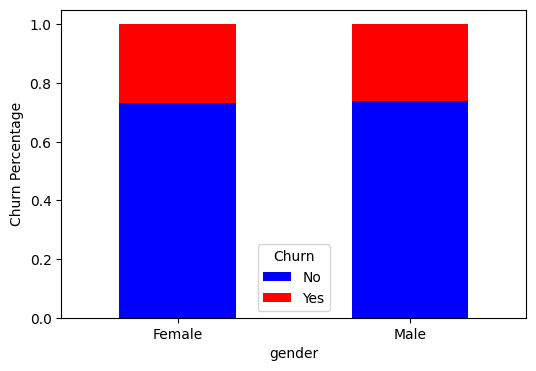

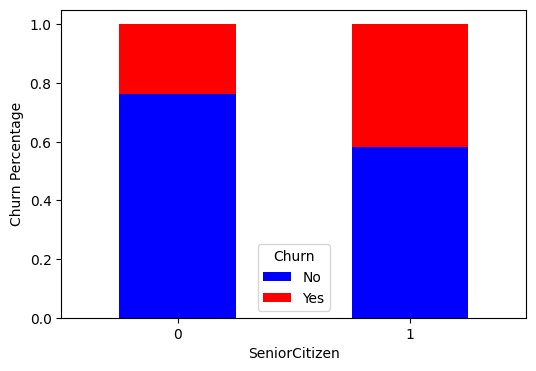

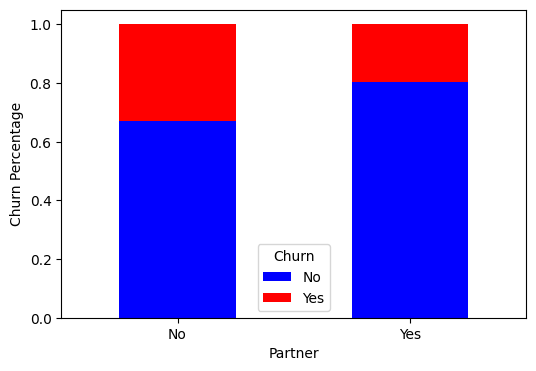

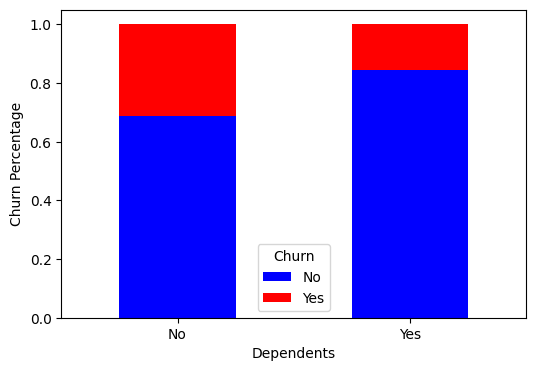

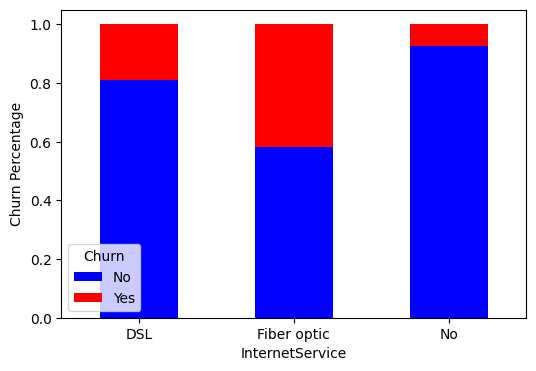

In [27]:
stacked_plot(df, "gender", "Churn") #gender'e göre churn oranları
stacked_plot(df, "SeniorCitizen", "Churn") #yaşlı olup olmamalarına göre churn oranları
stacked_plot(df, "Partner", "Churn") #partner olup olmamalarına göre churn oranları
stacked_plot(df, "Dependents", "Churn") #bağımlı olup olmamalarına göre churn oranları
stacked_plot(df, "InternetService", "Churn") #telefon servisi olup olmamalarına göre churn oranları

In [28]:
df["tenure"].describe() 

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [32]:
df["tenure"].value_counts().head(20)

tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
Name: count, dtype: int64

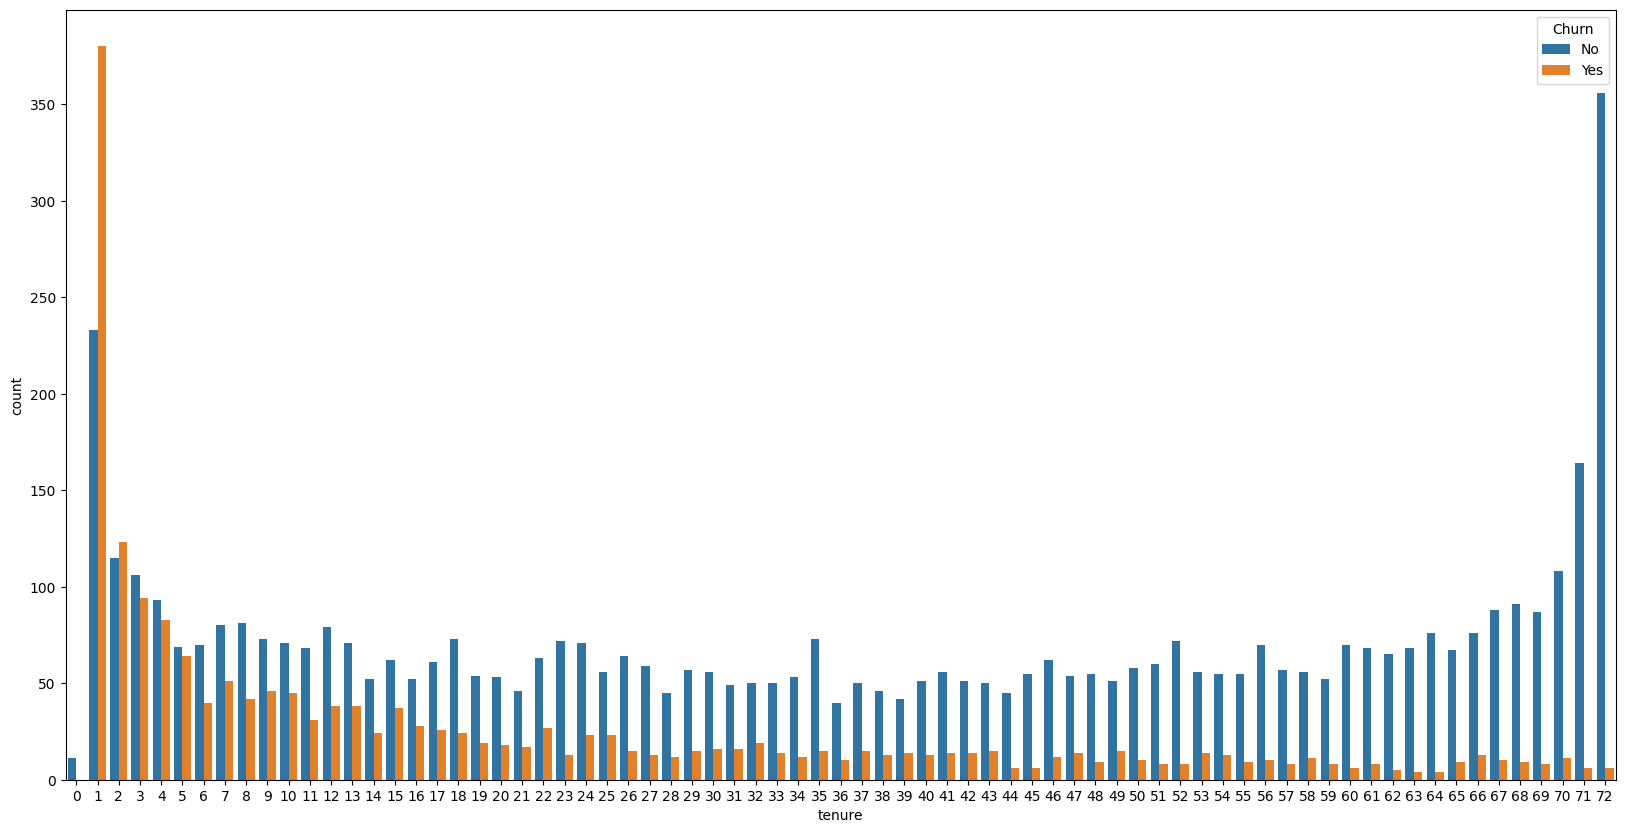

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x = "tenure", hue = "Churn", data = df)
plt.show()

In [35]:
def tenure(t):
    if t <= 12:
        return 1
    elif t > 12 and t<=24:
        return 2
    elif t >24 and t<=36:
        return 3
    elif t >36 and t<=48:
        return 4
    elif t >48 and t<=60:  
        return 5
    else:
        return 6

    

In [44]:
df["tenure_group"] = df["tenure"].apply(tenure)

In [45]:
df["tenure_group"].value_counts()

tenure_group
1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: count, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

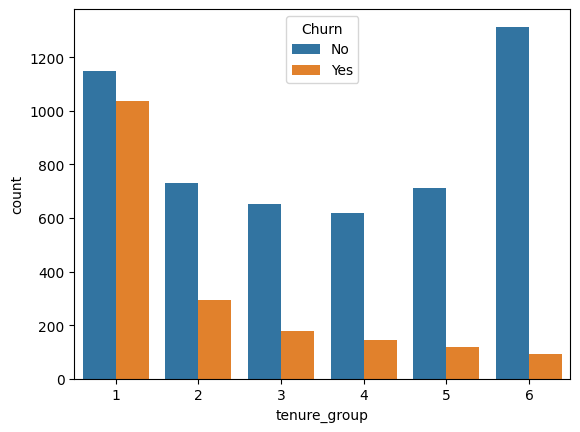

In [46]:
sns.countplot(x = "tenure_group", hue = "Churn", data = df)

In [71]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,mean_tenure_charge,tenure_group
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,-0.108968,0.016776
tenure,0.016567,1.000000,0.247900,0.826178,0.618499,0.989270
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,-0.439919,0.242795
TotalCharges,0.103006,0.826178,0.651174,1.000000,0.104232,0.817454
mean_tenure_charge,-0.108968,0.618499,-0.439919,0.104232,1.000000,0.611402
tenure_group,0.016776,0.989270,0.242795,0.817454,0.611402,1.000000


In [ ]:
# Dependents'dan sonraki değişkenler için nasıl bir churn davranışı yapmış?

## 1.1.2 - Total Charges

In [60]:
df["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [61]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].isna().sum()

11

In [62]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,mean_tenure_charge,tenure_group
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0.0,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0.0,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0.0,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0.0,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0.0,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0.0,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0.0,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0.0,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0.0,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0.0,1


In [64]:
df.loc[df["TotalCharges"].isnull(), "TotalCharges"] = 0
df.isnull().any().any()

False

In [65]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

Churn = df[df["Churn"] == "Yes"]
Not_Churn = df[df["Churn"] == "No"]

Text(0.5, 0, 'TotalCharges')

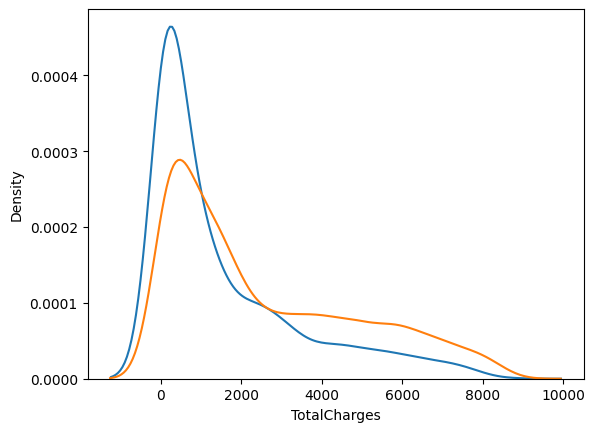

In [69]:
fig,ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"], label = "Churn", ax = ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not_Churn", ax = ax)
ax.set_xlabel("TotalCharges")


# Weibull Distribution
# Gamma Distribution
# Log Normal Distribution
# Exponential Distribution


# **2. Survival Analysis**

In [87]:
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.statistics import multivariate_logrank_test
from lifelines import CoxPHFitter

In [88]:
df = pd.read_csv("C:/Users/E. Korhan AKÇAY/Downloads/Telco-Customer-Churn.csv")
df.drop(['customerID'], axis=1, inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [90]:
LabelEncoder = LabelEncoder()
df.Churn = LabelEncoder.fit_transform(df.Churn)
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [91]:
eventvar = df["Churn"]
timevar = df["tenure"]

In [78]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [79]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [92]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

survivaldata = pd.get_dummies(df, columns = categorical, drop_first = True)

In [93]:
survivaldata.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.5,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [95]:
survivaldata = survivaldata.applymap(lambda x: 1 if x == True else 0 if x == False else x)

C:\Users\E. Korhan AKÇAY\AppData\Local\Temp\ipykernel_26952\2035875781.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  survivaldata = survivaldata.applymap(lambda x: 1 if x == True else 0 if x == False else x)


In [96]:
survivaldata

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.5,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.5,0,1,0,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,7362.9,0,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,346.45,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,306.6,1,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [97]:
#Survival Analysis
kmf = KaplanMeierFitter()

kmf.fit(timevar, event_observed = eventvar)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

<Axes: xlabel='timeline'>

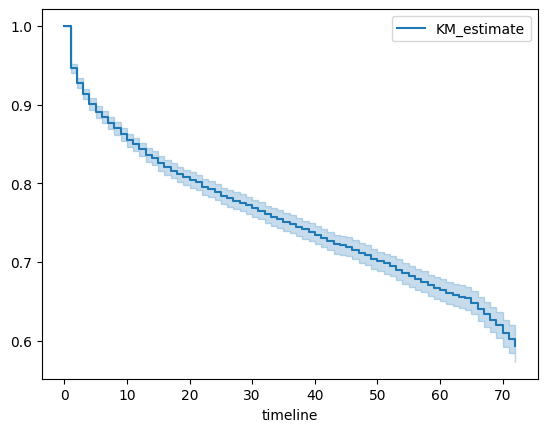

In [98]:
kmf.plot_survival_function()

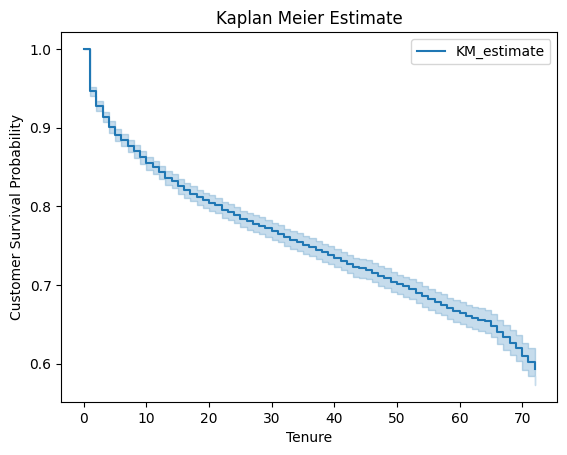

In [100]:
kmf.plot()
plt.ylabel("Customer Survival Probability")
plt.xlabel("Tenure")
plt.title("Kaplan Meier Estimate")
plt.show()


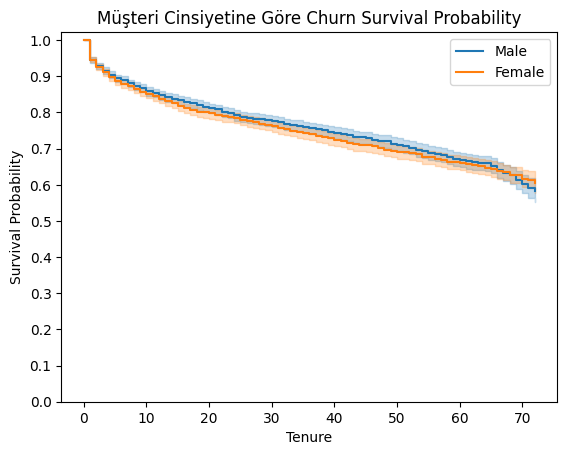

In [102]:
# Gender
male = (survivaldata['gender_Male'] == 1) 
female = (survivaldata['gender_Male'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[male], event_observed= eventvar[male], label = "Male")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[female], event_observed= eventvar[female], label = "Female")
plot1 = kmf.plot(ax = ax)

plt.title("Müşteri Cinsiyetine Göre Churn Survival Probability")
plt.xlabel("Tenure")
plt.ylabel("Survival Probability")
plt.yticks(np.linspace(0,1,11))
plt.show()

Logrank testi

İki veya daha fazla grubun sağkalım dağılımlarını karşılaştırmak için yapıyoruz. 
Testimiz, herhangi bir zaman noktasında olayın gerçekleşme olasılığında gruplar arasında fark olmadığını şekilnde H_0 olacaktır. 

In [104]:
groups = logrank_test(timevar[male], timevar[female], event_observed_A = eventvar[male], event_observed_B= eventvar[female])

groups.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

p değerine bakıyoruz. Eğer p < 0.05 ise H_0 red yani iki grup arasındaki sağ kalım eğrileri arasında istatistiksel olarak anlamlı bir fark vardır.
Eğer p > 0.05 ise H_0 kabul yani iki grup arasındaki sağ kalım eğrileri arasında istatistiksel olarak anlamlı bir fark yoktur.
